# **Sentimen Analisis Ulasan Aplikasi MyTelkomsel**

**Latar Belakang Masalah**

Belakangan ini, sorotan terhadap performa dan usabilitas aplikasi MyTelkomsel meningkat signifikan di kalangan pengguna media sosial. Berbagai keluhan mengenai kinerja yang kurang optimal dan pengalaman pengguna (usabilitas) yang kurang memuaskan menjadi topik perbincangan yang meluas. Bahkan, muncul konten khusus yang dibuat oleh pengguna untuk mendiskusikan kekurangan-kekurangan yang ada pada aplikasi ini. Fenomena ini mengindikasikan adanya potensi isu yang perlu diinvestigasi lebih lanjut dari perspektif pengguna.

**Tujuan Analisis Sentimen**

Proyek analisis sentimen ini bertujuan untuk secara sistematis menganalisis opini publik yang terkandung dalam ulasan pengguna aplikasi MyTelkomsel di Google Play Store. Dengan menganalisis sentimen (positif, negatif, atau netral) dari setiap ulasan, kita dapat memperoleh pemahaman yang mendalam mengenai persepsi pengguna terhadap aplikasi, mengidentifikasi area-area spesifik yang menjadi sumber ketidakpuasan, serta mengukur tingkat sentimen secara keseluruhan. Analisis ini diharapkan dapat menjawab pertanyaan-pertanyaan mendasar terkait pengalaman pengguna yang tercermin dalam keluhan-keluhan yang beredar.

# Import Library

Melakukan pemanggilan dan instalasi library yang akan digunakan dalam project. Library yang dipanggil akan digunakan untuk manipulasi data, visualisasi, serta preprocessing teks sebelum dilakukan pemodelan.

## Manipulasi data

In [1]:
import pandas as pd  # Untuk analisis data
import numpy as np  # Untuk komputasi numerik

## Visualisasi

In [2]:
import matplotlib.pyplot as plt  # Plotting dasar
import seaborn as sns  # Visualisasi statistik

## Text preprocessing

In [3]:
import re  # Ekspresi reguler
import string  # Operasi string
from nltk.tokenize import word_tokenize  # Memisahkan teks jadi kata
from nltk.corpus import stopwords  # Filter kata umum

In [4]:
!pip install sastrawi #B Install library Sastrawi

In [5]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Stopword Indonesia

In [6]:
import nltk  # NLP toolkit
nltk.download('punkt')  # Dataset tokenizer
nltk.download('punkt_tab')  # Dataset tokenizer tambahan
nltk.download('stopwords')  # Dataset stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Feature extraction

In [7]:
!pip install gensim

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import FastText, Word2Vec

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Training model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Reshape, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Loading Dataset

Langkah ini akan menagmbil dataset hasil scrapping google playstore untuk aplikasi MyTelkomsel yang disimpan pada direktori github. Pada langkah ini juga dilakukan pengecekan fitur yang dimiliki dataset, penanganan data missing value dan duplikat. Dataset ini disimpan dalam pandas dataframe bernama app_reviews_df.

In [10]:
app_reviews_df = pd.read_csv('https://raw.githubusercontent.com/syafiqirz/Analisis-Sentimen-Ulasan-Aplikasi-MyTelkomsel/refs/heads/main/review_mytelkomsel.csv')
app_reviews_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9e2ae970-a903-4808-b2b6-5406d048b114,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Dari sekian banyak Aplikasi, Cuma MYTelkomsel ...",1,68,8.7.0,2025-04-23 08:32:47,NaN,NaN,8.7.0
1,8d3aaf85-9f0b-47d2-b5db-5712d5d231ce,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Nggak tau knpa makin kesini telkomsel makin je...,1,837,8.7.0,2025-04-21 16:43:31,"Hai Kak Andika, silakan akses aplikasi MyTelko...",2025-04-22 06:43:06,8.7.0
2,2be72603-8f76-4400-8ef3-74e280d6ef87,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"saya berlangganan Telkomsel sudah sejak lama, ...",1,2837,8.7.0,2025-04-13 06:48:42,NaN,NaN,8.7.0
3,1a563fa6-57fc-4cfc-8340-ca6432f03e79,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bintang 1 cocok kali yah, pengguna Tsel puluha...",1,728,8.7.0,2025-04-19 02:19:32,NaN,NaN,8.7.0
4,a8a66172-c8e3-4b94-9000-cfce8f4f4984,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mohon di pertimbangkan untuk menghilangkan fit...,1,884,8.7.0,2025-04-13 04:22:11,NaN,NaN,8.7.0
...,...,...,...,...,...,...,...,...,...,...,...
134995,12334b5f-7d4a-4d94-b04d-98f93166466a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah di update malah tampilannya jadi kuran...,1,0,8.0.1,2024-05-29 00:11:21,"Maaf ya, Kak Ponamon. Terkait kendala aplikasi...",2024-05-29 05:15:29,8.0.1
134996,a0bb72b8-0659-4a77-9637-c3318c5d8fe9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kuota nya pada mahal Sinyal Lemot ga guna. seg...,1,0,NaN,2019-08-31 04:38:59,NaN,NaN,NaN
134997,9d9db87b-a0f0-4956-9d66-a80eb11db472,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi jgn keseringan maksa minta update ,, ...",1,0,6.12.2,2022-08-26 09:32:46,NaN,NaN,6.12.2
134998,2f627e78-c956-4ee5-a4a4-69a7805ab923,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Lebih nyaman dan mudah pemakaian tampilan lama...,2,0,8.0.1,2024-05-24 11:29:46,"Maaf ya, Kak Nadyra. Apakah kendala yang dimak...",2022-03-21 09:00:08,8.0.1


In [11]:
# Menampilkan info struktur data (kolom, tipe data, nilai non-null, dll)
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135000 entries, 0 to 134999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              135000 non-null  object
 1   userName              135000 non-null  object
 2   userImage             135000 non-null  object
 3   content               135000 non-null  object
 4   score                 135000 non-null  int64 
 5   thumbsUpCount         135000 non-null  int64 
 6   reviewCreatedVersion  109622 non-null  object
 7   at                    135000 non-null  object
 8   replyContent          68277 non-null   object
 9   repliedAt             68277 non-null   object
 10  appVersion            109622 non-null  object
dtypes: int64(2), object(9)
memory usage: 11.3+ MB


In [12]:
# Menghapus baris yang mengandung nilai NaN dan baris yang duplikat
app_reviews_df = app_reviews_df.dropna()
app_reviews_df = app_reviews_df.drop_duplicates()

In [13]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55101 entries, 1 to 134998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              55101 non-null  object
 1   userName              55101 non-null  object
 2   userImage             55101 non-null  object
 3   content               55101 non-null  object
 4   score                 55101 non-null  int64 
 5   thumbsUpCount         55101 non-null  int64 
 6   reviewCreatedVersion  55101 non-null  object
 7   at                    55101 non-null  object
 8   replyContent          55101 non-null  object
 9   repliedAt             55101 non-null  object
 10  appVersion            55101 non-null  object
dtypes: int64(2), object(9)
memory usage: 5.0+ MB


# Text Preprocessing

## Fungsi

In [14]:
# Fungsi untuk membersihkan teks dari berbagai noise dan karakter tidak penting
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Hapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # Hapus hashtag
    text = re.sub(r'RT[\s]', '', text)  # Hapus RT
    text = re.sub(r"http\S+", '', text)  # Hapus URL
    text = re.sub(r'[0-9]+', '', text)  # Hapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Hapus karakter khusus

    text = text.replace('\n', ' ')  # Ganti newline dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
    text = text.strip(' ')  # Hapus spasi di awal/akhir
    return text

In [15]:
# Fungsi untuk menghapus semua tanda baca dari teks
def remove_punctuation(text):
    punctuation_set = set(string.punctuation)  # Set berisi semua karakter tanda baca

    text = ''.join(char for char in text if char not in punctuation_set)  # Hapus karakter yang termasuk tanda baca

    return text

In [16]:
# Fungsi untuk mengubah teks menjadi lowercase
def casefoldingText(text):
    text = text.lower()
    return text

In [17]:
# Kamus konversi kata slang ke bahasa formal
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split() # Pisahkan teks menjadi list kata-kata
    fixed_words = [] # Penyimpanan hasil konversi

    for word in words:
        if word.lower() in slangwords: # Cek apakah kata termasuk slang
            fixed_words.append(slangwords[word.lower()]) # Ganti dengan versi formal
        else:
            fixed_words.append(word) # Pertahankan kata jika bukan slang

    fixed_text = ' '.join(fixed_words) # Gabungkan kembali menjadi teks utuh
    return fixed_text

In [18]:
# Membuang kata-kata yang umum dan tidak perlu
def filteringText(text):
    # Inisialisasi stopword remover untuk bahasa Indonesia
    factory = StopWordRemoverFactory()
    stopwords_sastrawi = factory.get_stop_words()  # Mendapatkan daftar stopword

    filtered_word = []  # List untuk menyimpan kata yang lolos filter
    for txt in text:
        if txt not in stopwords_sastrawi:  # Cek apakah kata bukan stopword
            filtered_word.append(txt)  # Tambahkan kata jika bukan stopword

    text = filtered_word  # Update teks dengan hasil filter
    return text

In [19]:
# Memisahkan teks menjadi list kata-kata individual
def tokenizingText(text):
    text = word_tokenize(text)  # Memisahkan tiap kata dengan indeks
    return text

In [20]:
# Menggabungkan teks menjadi kalimat utuh kembali
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

## Preprocessing

In [21]:
# Buat dataframe untuk menampung data yang sudah dibersihakan
processed_df = app_reviews_df

In [22]:
# Membersihkan teks dengan fungsi-fungsi yang telah didefinisiakn dan menyimpannya di kolom 'text_cleaned'
processed_df['text_cleaned'] = processed_df['content'].apply(cleaningText)
processed_df['text_cleaned'] = processed_df['text_cleaned'].apply(remove_punctuation)
processed_df['text_cleaned'] = processed_df['text_cleaned'].apply(casefoldingText)
processed_df['text_cleaned'] = processed_df['text_cleaned'].apply(fix_slangwords)
processed_df['text_cleaned'] = processed_df['text_cleaned'].apply(tokenizingText)
processed_df['text_cleaned'] = processed_df['text_cleaned'].apply(filteringText)
processed_df['text_string'] = processed_df['text_cleaned'].apply(toSentence)

In [23]:
# Menampilkan data yang telah dibersihkan dalam dataframe processed_df
processed_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_cleaned,text_string
1,8d3aaf85-9f0b-47d2-b5db-5712d5d231ce,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Nggak tau knpa makin kesini telkomsel makin je...,1,837,8.7.0,2025-04-21 16:43:31,"Hai Kak Andika, silakan akses aplikasi MyTelko...",2025-04-22 06:43:06,8.7.0,"[tahu, makin, kesini, telkomsel, makin, jelek,...",tahu makin kesini telkomsel makin jelek maaf k...
5,fc880b94-3370-4816-ad1d-cd2639f1146c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi paling jelek sedunia, loading terus p...",1,114,8.7.0,2025-04-21 12:58:40,"Hai Kak Ata, Mohon maaf untuk ketidaknyamanann...",2025-04-21 13:32:05,8.7.0,"[aplikasi, paling, jelek, sedunia, loading, te...",aplikasi paling jelek sedunia loading terus pa...
7,f779bf0e-44bd-4520-8178-ade9122bd6f7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,paket promo yang ada di oesan sms tidak bisa d...,1,952,8.7.0,2025-04-13 02:42:53,Hai Kak Langga. Mohon maaf untuk ketidaknyaman...,2025-04-13 04:51:42,8.7.0,"[paket, promo, oesan, sms, dibeli, semakin, la...",paket promo oesan sms dibeli semakin lama kuot...
8,395f4e1b-da64-4862-ba60-921adb857df5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ni aplikasi kenapa dah udh lama begini setiap ...,1,243,8.7.0,2025-04-14 05:26:55,"Hai Kak Cecep, Mohon maaf untuk ketidaknyamana...",2024-12-05 11:12:57,8.7.0,"[aplikasi, deh, udh, lama, begini, buka, aplik...",aplikasi deh udh lama begini buka aplikasi nya...
12,282218be-5447-4b97-9706-53ecf586c483,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya berat banget... Dan Jaringan telko...,2,190,8.7.0,2025-04-10 08:10:15,"Maaf ya, Kak Hans. Untuk keluhan aplikasi MyTe...",2021-02-21 03:17:52,8.7.0,"[aplikasinya, berat, banget, jaringan, telkoms...",aplikasinya berat banget jaringan telkomsel se...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134984,f929c60d-42d5-4ac2-9327-2f40cdaa2afc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya pelanggan dari 2002 dg telkomsel. Lha skr...,1,0,6.8.0,2022-04-21 12:25:19,"Mohon maaf ya, Kak Vandi. Untuk keluhan sinyal...",2022-04-21 12:42:16,6.8.0,"[pelanggan, dg, telkomsel, lha, skrng, harga, ...",pelanggan dg telkomsel lha skrng harga tambah ...
134990,4dff2367-06ed-479f-86aa-a34bb34761e1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sangat tidak memuaskan,coba beli token PLN tpi...",1,0,8.0.1,2024-05-20 13:03:12,"Maaf banget ya, Kak Edy. Perihal keluhan pembe...",2024-05-20 15:02:22,8.0.1,"[sangat, memuaskancoba, beli, token, pln, masu...",sangat memuaskancoba beli token pln masuk toke...
134991,834a7ce4-9827-4b57-bc84-4d19df8e23bb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi taik setelah apdet smua paket yg mura...,1,2,8.0.1,2024-05-10 15:09:20,"Hai, Kak. Maaf banget ya, untuk keluhan aplika...",2024-05-10 23:19:39,8.0.1,"[aplikasi, tahi, apdet, smua, paket, murah, gk...",aplikasi tahi apdet smua paket murah gk ambili...
134995,12334b5f-7d4a-4d94-b04d-98f93166466a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah di update malah tampilannya jadi kuran...,1,0,8.0.1,2024-05-29 00:11:21,"Maaf ya, Kak Ponamon. Terkait kendala aplikasi...",2024-05-29 05:15:29,8.0.1,"[update, bahkan, tampilannya, jadi, kurangcara...",update bahkan tampilannya jadi kurangcara gant...


# Labeling

### Load lexicon

Kode ini mengunduh dua kamus lexicon sentimen (positif dan negatif) dari GitHub untuk analisis teks. Setiap lexicon disimpan sebagai dictionary dengan kata sebagai key dan skor sentimen (angka positif/negatif) sebagai value. Lexicon positif berisi kata-kata seperti "bahagia" (skor +3), sedangkan lexicon negatif berisi kata seperti "sedih" (skor -2). Data ini nantinya digunakan untuk menghitung nilai sentimen teks dengan mencocokkan kata-kata yang ada dalam teks dengan entri kamus ini. Jika pengunduhan gagal, program akan menampilkan pesan error tanpa menghentikan proses.



In [24]:
import csv
import requests
from io import StringIO

lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")


### Labeling data

Sel di bawah ini akan menghitung skor yang didapat dari tiap kalimat. Setelah itu, dijumlahkan dan menentukan apakah satu kalimat ulasan termasuk kelas sentimen postif, netral, atau negatif berdasarkan hasil yang mereka dapatkan.

In [25]:
def labeling_by_lexicon(text):
    score = 0  # Inisialisasi skor sentimen awal

    # Hitung skor positif dari kata-kata dalam teks
    for word in text:
        if (word in lexicon_positive):
            score += lexicon_positive[word]  # Tambahkan nilai positif kata ke total skor

    # Hitung skor negatif dari kata-kata dalam teks
    for word in text:
        if (word in lexicon_negative):
            score += lexicon_negative[word]  # Tambahkan nilai negatif kata ke total skor

    # Tentukan polaritas berdasarkan skor akhir
    if (score > 0):
        polarity = 'positive'  # Skor positif menunjukkan sentimen positif
    elif (score < 0):
        polarity = 'negative'  # Skor negatif menunjukkan sentimen negatif
    else:
        polarity = 'neutral'   # Skor nol menunjukkan sentimen netral

    return score, polarity  # Output: total skor dan kategori sentimen

In [26]:
# Terapkan fungsi labeling ke setiap teks yang sudah diproses
results = processed_df['text_cleaned'].apply(labeling_by_lexicon)  # Hasilnya berupa list tuple (score, polarity)
results = list(zip(*results))  # Unzip tuple menjadi 2 list terpisah
processed_df['polarity_score'] = results[0]  # Masukkan skor ke dataframe
processed_df['polarity'] = results[1]  # Masukkan kategori sentimen ke dataframe
print(processed_df['polarity'].value_counts())  # Hitung frekuensi masing-masing kategori sentimen

polarity
negative    35460
positive    16677
neutral      2964
Name: count, dtype: int64


### Persentase distribusi kelas sentimen

Setelah setiap baris ulasan sudah memiliki label, kita ingin mengetahui sebaran berapa banyak ulasan dengan tiap sentimen yang ada. Sebaran sentimen dalam persentase akan divisualisasikan dalam bentuk pie chart.

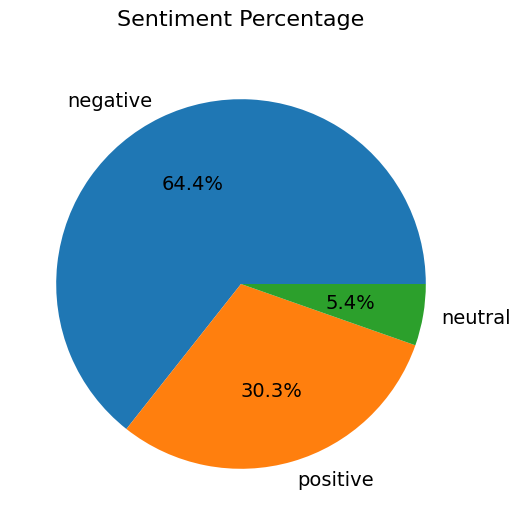

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))

sizes = [count for count in processed_df['polarity'].value_counts()]   # Jumlah data tiap sentimen
labels = list(processed_df['polarity'].value_counts().index) # Label kategori sentimen
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})
ax.set_title('Sentiment Percentage', fontsize=16, pad=20) # Pie chart dengan persentase
plt.show()

### Visualisasi distribusi kelas sentimen

Kode ini akan menampilkan sebaran jumlah sentimen berdasarkan jumlahnya dalam dataset.

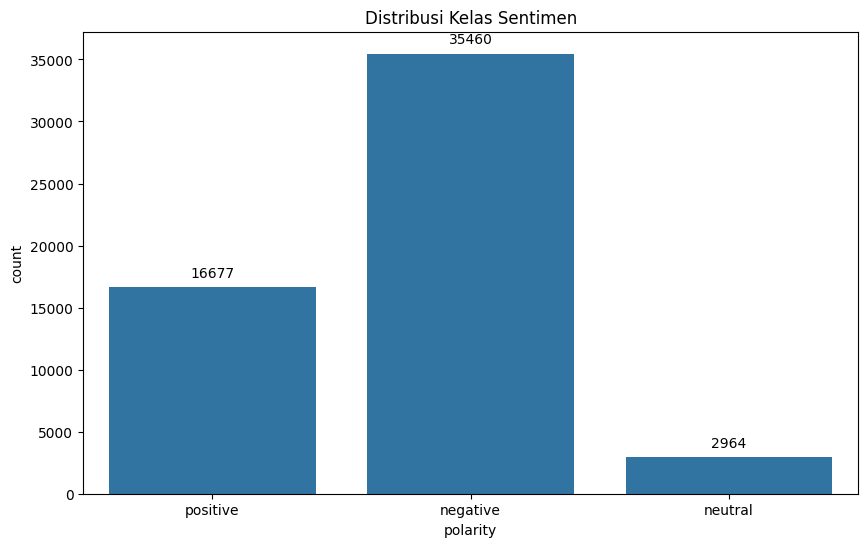

In [28]:
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=processed_df)  # Plot jumlah data per kategori sentimen
plt.title('Distribusi Kelas Sentimen')

# Tambah label jumlah di atas bar
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),  # Format angka tanpa desimal
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center',
                            xytext=(0, 10),
                            textcoords='offset points')
plt.show()

### Visualisai distribusi panjang teks

Kita ingin mengetahui seberapa panjang teks yang diutarakan pengulas dengan menghitung jumlah kata yang ada dalam satu kalimat. Menurut hasil visualisasi yang ditampilkan, ulasan yang dikirimkan mayoritas maksimal di 50 kata.

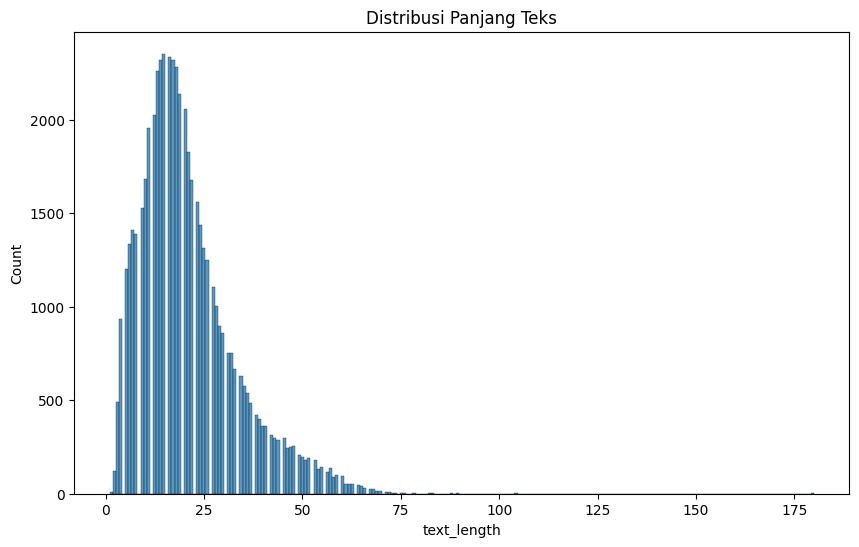

In [29]:
plt.figure(figsize=(10, 6))
processed_df['text_length'] = processed_df['text_cleaned'].apply(len)  # Hitung jumlah kata
sns.histplot(processed_df['text_length'])  # Visualisasi distribusi panjang teks
plt.title('Distribusi Panjang Teks')
plt.show()

### Visualisasi frekuensi kata yang sering muncul

Dari keseluruhan ulasan yang diambil, kita akan melihat kata yang sering muncul atau yang frekuensinya paling tinggi di seluruh dokumen (ulasan). Grafik ini akan menampilkan 20 kata yang frekuensinya paling tinggi.

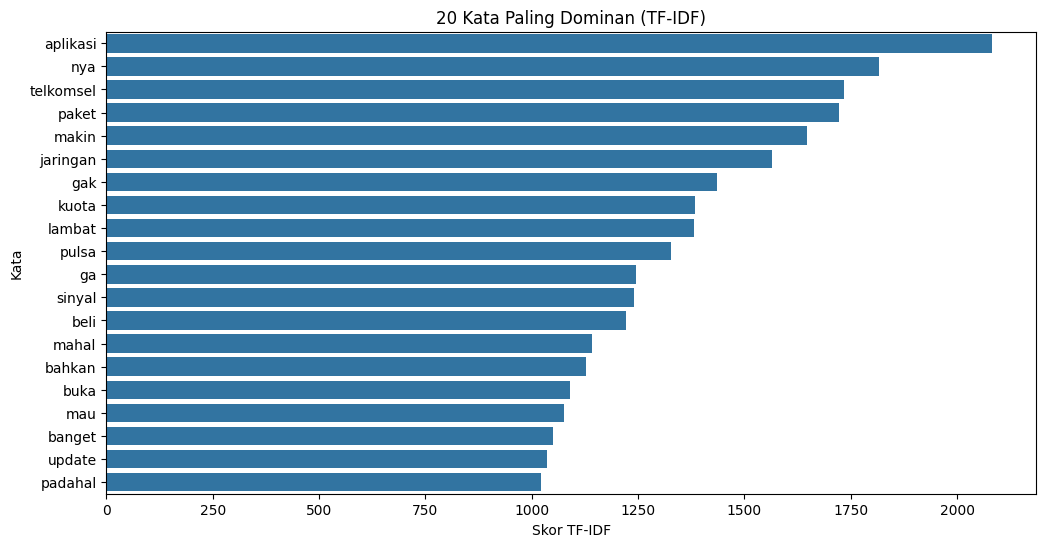

In [30]:
plt.figure(figsize=(12, 6))

# Inisialisasi dan hitung TF-IDF
vectorizer = TfidfVectorizer()  # Buat objek vectorizer
X = vectorizer.fit_transform(processed_df['text_string'])  # Hitung TF-IDF dari string

# Buat dataframe hasil TF-IDF
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')  # Jumlahkan nilai TF-IDF per kata
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)  # Ambil 20 kata teratas

# Visualisasi
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('20 Kata Paling Dominan (TF-IDF)')
plt.xlabel('Skor TF-IDF')
plt.ylabel('Kata')
plt.show()

### Encoding Label

Setelah dilakukan labeling, kita akan melakukan encoding label ke dalam bentuk numerik menggunakan label encoding. Nilai numerik dapat mudah dimengerti dan diproses oleh algoritma dibanding dengan string.

In [31]:
map = {'positive': 0, 'neutral': 1, 'negative': 2}
processed_df['polarity'] = processed_df['polarity'].map(map)

# Feature Extraction

Untuk mengetahui tone atau sentimen yang terkandung pada sebuah kalimat, kita perlu menggunakan feature extraction. Langkah ini akan memproses kata kata dalam kalimat dengan berbagai metode untuk dapat menemukan pola yang terkandung pada urutan kata dalam kalimat. Pada project kali ini akan dilakukan feature extraction dengan metode TF-IDF, Word2Vector, dan Fasttext.

## TF-IDF

Untuk TF-IDF, sel ini akan memproses teks, lalu menggunakan TfidfVectorizer dari scikit-learn untuk mengubah teks menjadi matriks nilai TF-IDF yang merepresentasikan pentingnya kata dalam dokumen.

In [32]:
tfidf = TfidfVectorizer(max_features=5000, min_df=20, max_df=0.8)
X_tfidf = tfidf.fit_transform(processed_df['text_string']).toarray()

## Word2Vec

Dalam Word2vec, sel ini akan melatih model menggunakan library gensim pada data teks untuk mendapatkan representasi vektor (embeddings) dari setiap kata, di mana kata-kata serupa memiliki vektor yang berdekatan; representasi dokumen biasanya didapatkan dengan merata-ratakan vektor kata-katanya.

In [33]:
w2v_model = Word2Vec(sentences=processed_df['text_cleaned'],
                    vector_size=300, window=5, min_count=5, workers=8)

def document_vector(word2vec_model, doc):
    doc = [word for word in doc if word in word2vec_model.wv.key_to_index]
    if len(doc) == 0:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word2vec_model.wv[doc], axis=0)

X_w2v = np.array([document_vector(w2v_model, doc) for doc in processed_df['text_cleaned']])

## FastText

Terakhir, dengan FastText, sel ini akan melatih model menggunakan library fasttext yang tidak hanya menghasilkan embeddings kata tetapi juga mempertimbangkan n-gram karakter, memungkinkan representasi kata di luar kosakata; representasi dokumen juga umumnya didapatkan dengan merata-ratakan vektor kata.

In [34]:
ft_model = FastText(sentences=processed_df['text_cleaned'],
                   vector_size=300, window=5, min_count=1, workers=8)
X_ft = np.array([document_vector(ft_model, doc) for doc in processed_df['text_cleaned']])

# Training Model

Kode ini membagi dataset menjadi data latih dan uji (80:20) untuk representasi fitur TF-IDF, Word2vec, dan FastText, serta label polaritas yang sesuai. Tujuannya adalah untuk mengevaluasi model pada data yang belum pernah dilihat.

In [35]:
# Split data
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, processed_df['polarity'], test_size=0.2)
X_train_w2v, X_test_w2v, _, _ = train_test_split(X_w2v, processed_df['polarity'], test_size=0.2)
X_train_ft, X_test_ft, _, _ = train_test_split(X_ft, processed_df['polarity'], test_size=0.2)

Fungsi myCallback mendefinisikan aksi untuk menghentikan pelatihan model Keras secara otomatis saat akurasi mencapai 92%, untuk efisiensi waktu dan sumber daya.

In [36]:
# Fungsi callback
class myCallback(Callback):
  def on_epoch_end(self, epoch, log={}):
    if(log.get('accuracy')>=0.92):
      print("\nAkurasi telah mencapai 92%!")
      self.model.stop_training = True
callbacks = myCallback()

Fungsi evaluate_model mengukur kinerja model pada data uji dengan menghitung akurasi dan menampilkan laporan klasifikasi yang berisi presisi, recall, dan F1-score untuk setiap kelas.

In [37]:
# Fungsi evaluasi
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy: {accuracy:.4f}')
    y_pred = np.argmax(model.predict(X_test), axis=1)
    print(classification_report(y_test, y_pred))

Fungsi plot_loss_accuracy membuat visualisasi grafik yang menunjukkan bagaimana nilai loss dan akurasi model berubah selama setiap epoch pelatihan, membantu dalam menganalisis proses pembelajaran model.

In [38]:
# Fungsi plot akurasi dan loss
def plot_loss_accuracy(history):
    # Hitung jumlah epoch dari riwayat loss
    n_epochs = len(history.history['loss'])
    epochs = range(1, n_epochs + 1)

    plt.figure(figsize=(12, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], marker='o', label='Train Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.xlim(1, n_epochs)
    plt.ylim(0, 1)
    plt.legend(loc='upper right')

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], marker='o', label='Train Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.xlim(1, n_epochs)
    plt.ylim(0, 1)
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()


## Dense

Kita akan menggunakan model dense neural network untuk melatih model dengan ketiga jenis feature extraction (TF-IDF, Word2Vec, dan FastText). Pada model dense ini akan ada dua lapisan dense. Lapisan dense pertama memiliki 64 neuron dengan fungsi aktivasi 'leaky_relu' dan menerima input sesuai dengan jumlah fitur dari masing-masing metode feature extraction. Dropout sebesar 0.2 diterapkan setelah lapisan pertama untuk mengurangi risiko overfitting. Lapisan dense kedua merupakan lapisan output dengan 3 neuron (sesuai jumlah kelas sentimen) dan fungsi aktivasi 'softmax' untuk menghasilkan probabilitas prediksi kelas. Digunakan juga batch size sebesar 32 untuk membagi data latih menjadi kelompok-kelompok kecil yang akan diproses secara bersamaan selama pelatihan, mempercepat proses dan berpotensi meningkatkan generalisasi model. Terdapat juga callbacks dengan fungsi yang telah dibuat sebelumnya untuk menghentikan pelatihan secara otomatis jika akurasi validasi mencapai tingkat tertentu. Kemudian, hasil training model disimpan pada variabel hist_dense_tfidf atau hist_dense_w2v, dan kemudian dilakukan visualisasi untuk menganalisis bagaimana loss dan akurasi model berkembang selama proses pelatihan.

### TF-IDF

In [39]:
# 1. Dense Network dengan TF-IDF
dense_tfidf = Sequential([
    Dense(64, activation='leaky_relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
dense_tfidf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_dense_tfidf = dense_tfidf.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, callbacks=[callbacks])
evaluate_model(dense_tfidf, X_test_tfidf, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7623 - loss: 0.6089
Epoch 2/10
1369/1378 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9211 - loss: 0.2291
Akurasi telah mencapai 92%!
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9211 - loss: 0.2290
Test Accuracy: 0.9239
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3346
           1       0.80      0.23      0.36       620
           2       0.94      0.97      0.96      7055

    accuracy                           0.92     11021
   macro avg       0.88      0.72      0.74     11021
weighted avg       0.92      0.92      0.91     11021



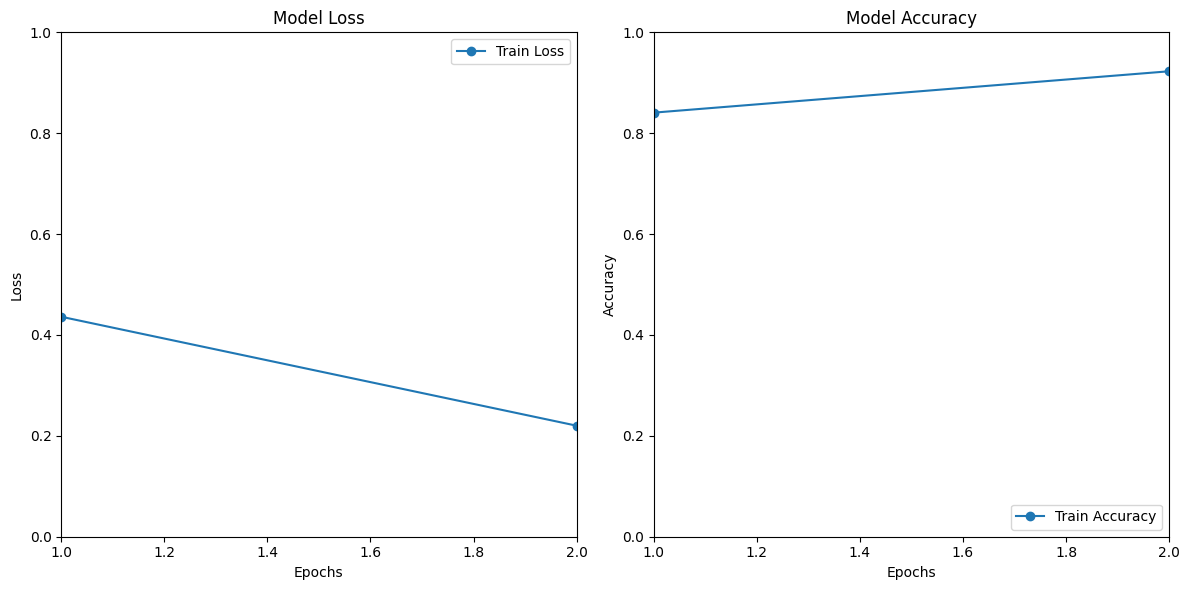

In [40]:
plot_loss_accuracy(hist_dense_tfidf)

### Word2Vector

In [41]:
# 2. Dense Network dengan Word2Vec
dense_w2v = Sequential([
    Dense(64, activation='leaky_relu', input_shape=(X_train_w2v.shape[1],)),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
dense_w2v.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_dense_w2v = dense_w2v.fit(X_train_w2v, y_train, epochs=10, batch_size=32, callbacks=[callbacks])
evaluate_model(dense_w2v, X_test_w2v, y_test)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6393 - loss: 0.8239
Epoch 2/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6434 - loss: 0.8086
Epoch 3/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6481 - loss: 0.8009
Epoch 4/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6432 - loss: 0.8047
Epoch 5/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6412 - loss: 0.8098
Epoch 6/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6492 - loss: 0.8004
Epoch 7/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6470 - loss: 0.8021
Epoch 8/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6448 - loss: 0.8034
Epoch 9/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6428 - loss: 0.8032
Epoch 10/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6478 - loss: 0.8000
Test Accuracy: 0.6401
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


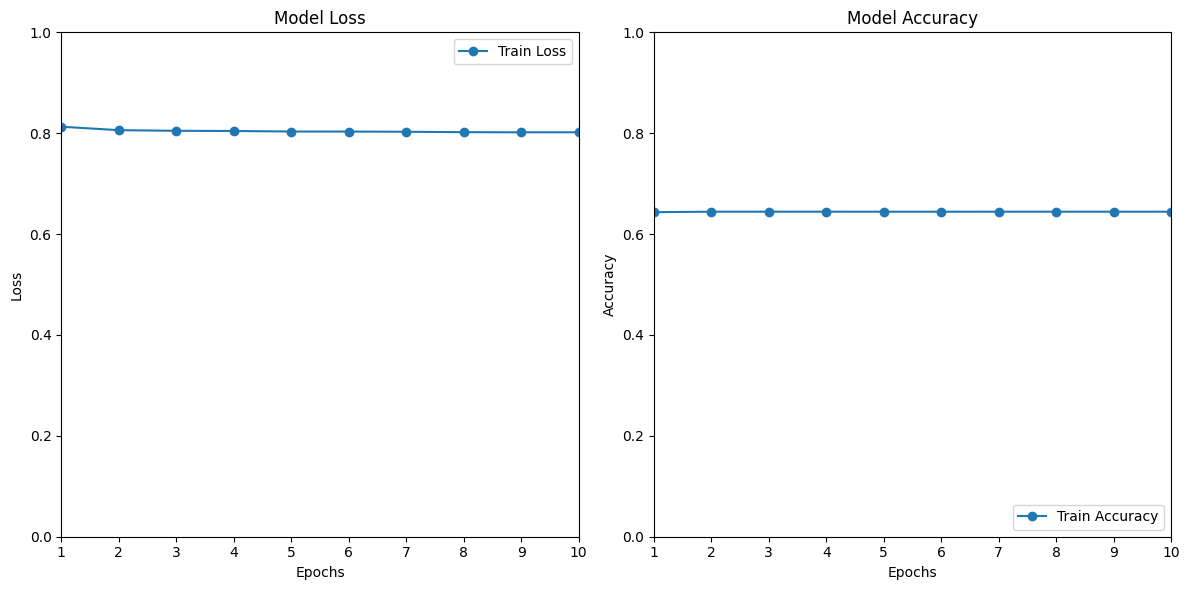

In [42]:
plot_loss_accuracy(hist_dense_w2v)

### FastText

In [43]:
# 3. Dense Network dengan FastText
dense_ft = Sequential([
    Dense(64, activation='leaky_relu', input_shape=(X_train_ft.shape[1],)),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
dense_ft.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_dense_ft = dense_ft.fit(X_train_ft, y_train, epochs=10, batch_size=32, callbacks=[callbacks])
evaluate_model(dense_ft, X_test_ft, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6292 - loss: 0.8312
Epoch 2/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6470 - loss: 0.8014
Epoch 3/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6455 - loss: 0.8062
Epoch 4/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6431 - loss: 0.8038
Epoch 5/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6447 - loss: 0.8044
Epoch 6/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6466 - loss: 0.8028
Epoch 7/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6420 - loss: 0.8061
Epoch 8/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6443 - loss: 0.8004
Epoch 9/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6456 - loss: 0.8035
Epoch 10/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6411 - loss: 0.8062
Test Accuracy: 0.6401
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


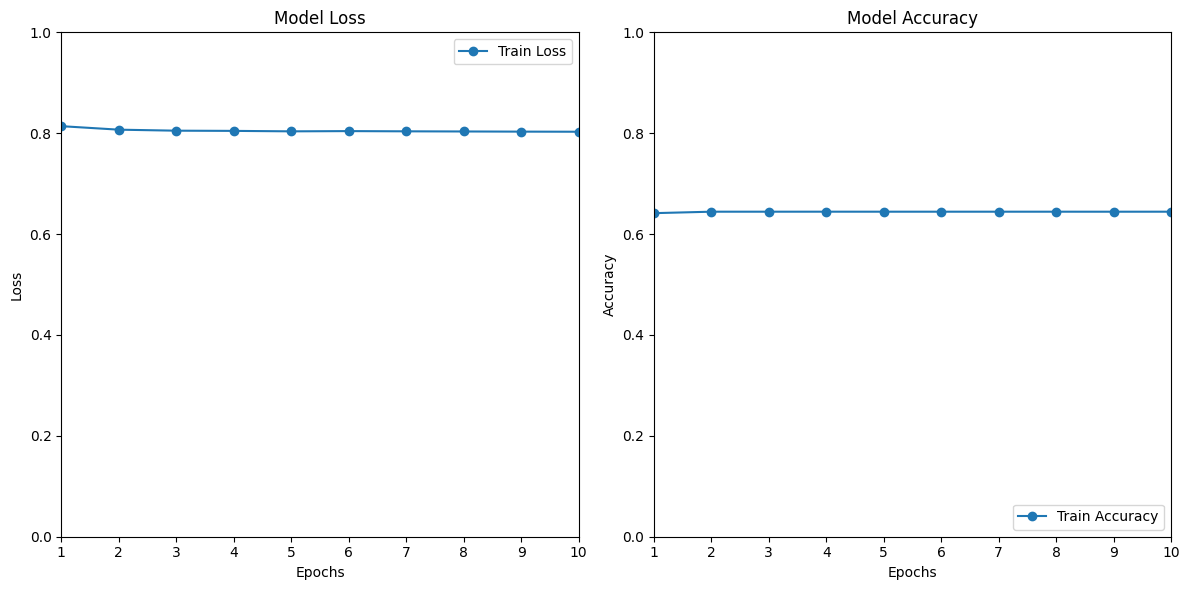

In [44]:
plot_loss_accuracy(hist_dense_ft)

## LSTM

Kita akan menggunakan model Long Short-Term Memory (LSTM) untuk melatih model dengan ketiga jenis feature extraction. Pada model LSTM ini, input dari feature extraction akan diubah terlebih dahulu menjadi format sekuensial menggunakan lapisan Reshape. Kemudian, terdapat satu lapisan LSTM dengan 128 unit yang akan memproses sekuens tersebut. Dropout sebesar 0.2 diterapkan setelah lapisan LSTM untuk mencegah overfitting. Lapisan dense terakhir memiliki 3 neuron dengan aktivasi 'softmax' untuk klasifikasi sentimen. Digunakan juga batch size sebesar 32 untuk membagi data latih selama proses pelatihan. Terdapat juga callbacks dengan fungsi yang dibuat untuk mengontrol jalannya pelatihan berdasarkan metrik tertentu. Kemudian, hasil training model LSTM disimpan pada variabel hist_lstm_w2v, dan kemudian dilakukan visualisasi untuk memahami dinamika loss dan akurasi selama pelatihan.

### TF-IDF

In [45]:
# 4. LSTM dengan TF-IDF
lstm_tfidf = Sequential([
    Reshape((1, X_train_tfidf.shape[1]), input_shape=(X_train_tfidf.shape[1],)),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
lstm_tfidf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_lstm_tfidf = lstm_tfidf.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, callbacks=[callbacks])
evaluate_model(lstm_tfidf, X_test_tfidf, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7599 - loss: 0.6063
Epoch 2/10
1370/1378 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9286 - loss: 0.2007
Akurasi telah mencapai 92%!
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9286 - loss: 0.2007
Test Accuracy: 0.9241
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      3346
           1       0.80      0.24      0.37       620
           2       0.94      0.97      0.96      7055

    accuracy                           0.92     11021
   macro avg       0.88      0.72      0.75     11021
weighted avg       0.92      0.92      0.91     11021



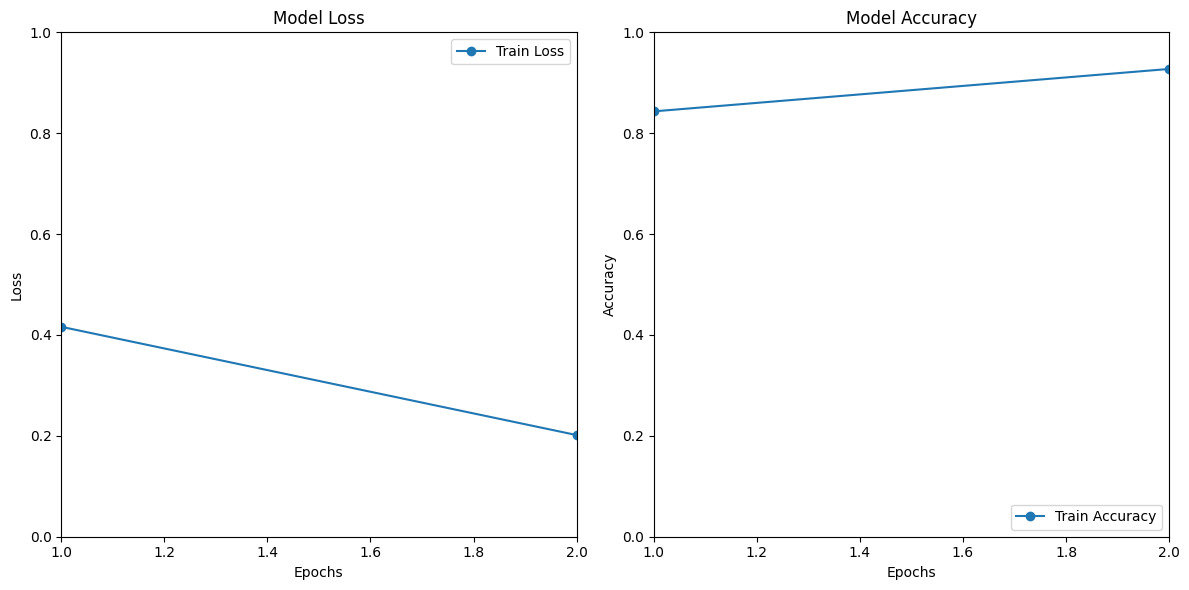

In [46]:
plot_loss_accuracy(hist_lstm_tfidf)

### Word2Vector

In [47]:
# 5. LSTM dengan Word2Vec
lstm_w2v = Sequential([
    Reshape((1, X_train_w2v.shape[1]), input_shape=(X_train_w2v.shape[1],)),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
lstm_w2v.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_lstm_w2v = lstm_w2v.fit(X_train_w2v, y_train, epochs=10, batch_size=32, callbacks=[callbacks])
evaluate_model(lstm_w2v, X_test_w2v, y_test)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1378/1378 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6427 - loss: 0.8161
Epoch 2/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6440 - loss: 0.8018
Epoch 3/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6443 - loss: 0.8013
Epoch 4/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6433 - loss: 0.8036
Epoch 5/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6457 - loss: 0.8003
Epoch 6/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6420 - loss: 0.8054
Epoch 7/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6430 - loss: 0.7997
Epoch 8/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6449 - loss: 0.7934
Epoch 9/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6420 - loss: 0.7990
Epoch 10/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6441 - loss: 0.8002
Test Accuracy: 0.6399
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

         

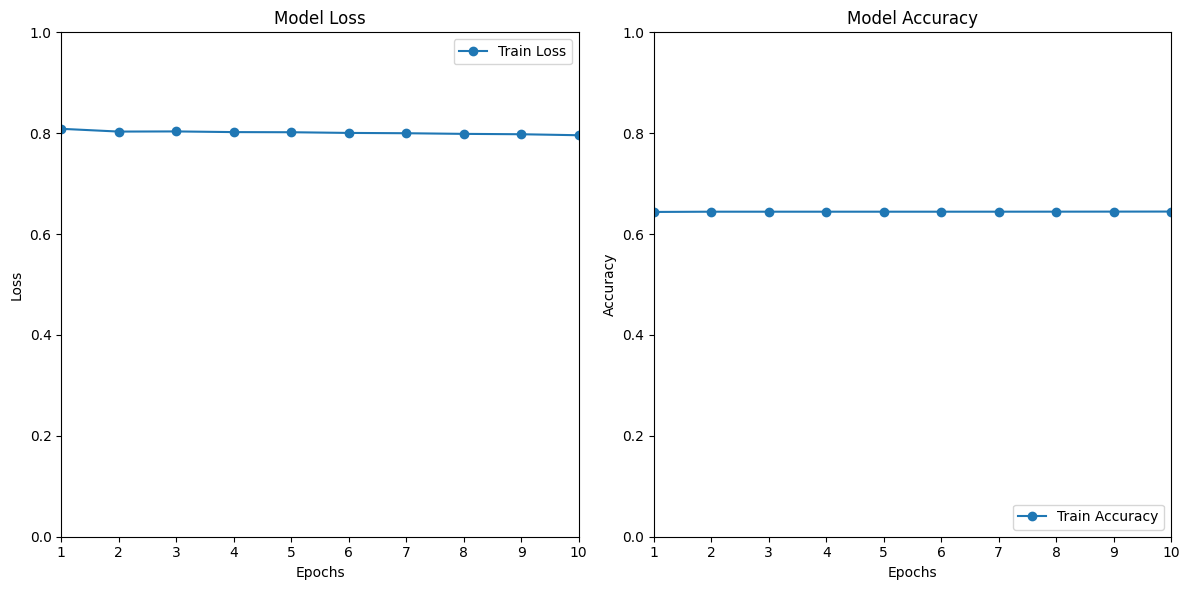

In [48]:
plot_loss_accuracy(hist_lstm_w2v)

### FastText

In [49]:
# 6. LSTM dengan FastText
lstm_ft = Sequential([
    Reshape((1, X_train_ft.shape[1]), input_shape=(X_train_ft.shape[1],)),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
lstm_ft.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_lstm_ft = lstm_ft.fit(X_train_ft, y_train, epochs=10, batch_size=32, callbacks=[callbacks])
evaluate_model(lstm_ft, X_test_ft, y_test)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1378/1378 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6428 - loss: 0.8153
Epoch 2/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6433 - loss: 0.8057
Epoch 3/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6460 - loss: 0.8017
Epoch 4/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6459 - loss: 0.7984
Epoch 5/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6483 - loss: 0.8001
Epoch 6/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6433 - loss: 0.8026
Epoch 7/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6501 - loss: 0.7965
Epoch 8/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6453 - loss: 0.8006
Epoch 9/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6447 - loss: 0.8025
Epoch 10/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6455 - loss: 0.7969
Test Accuracy: 0.6401
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

        

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


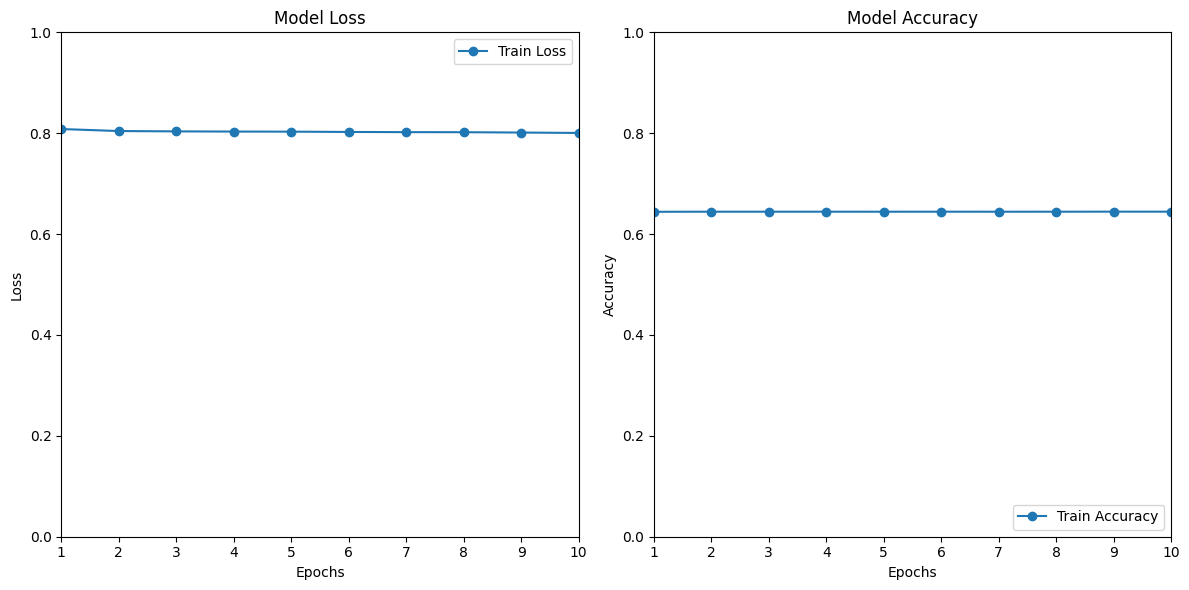

In [50]:
plot_loss_accuracy(hist_lstm_ft)

## GRU

Kita akan menggunakan model Gated Recurrent Unit (GRU) untuk melatih model dengan ketiga jenis feature extraction. Mirip dengan LSTM, input dari feature extraction akan diubah menjadi format sekuensial menggunakan lapisan Reshape. Model GRU ini memiliki satu lapisan GRU dengan 128 unit untuk memproses data sekuensial. Dropout sebesar 0.2 diterapkan setelah lapisan GRU untuk regularisasi. Lapisan output adalah lapisan dense dengan 3 neuron dan fungsi aktivasi 'softmax' untuk menghasilkan prediksi sentimen. Digunakan juga batch size sebesar 32 selama proses pelatihan. Terdapat juga callbacks dengan fungsi yang telah didefinisikan sebelumnya untuk mengatur proses pelatihan. Kemudian, hasil training model GRU disimpan pada variabel hist_gru_ft, dan kemudian dilakukan visualisasi untuk mengevaluasi kemajuan pelatihan melalui grafik loss dan akurasi.

### TF-IDF

In [51]:
# 7. GRU dengan TF-IDF
gru_tfidf = Sequential([
    Reshape((1, X_train_tfidf.shape[1]), input_shape=(X_train_tfidf.shape[1],)),
    GRU(128, return_sequences=False),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
gru_tfidf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_gru_tfidf = gru_tfidf.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, callbacks=[callbacks])
evaluate_model(gru_tfidf, X_test_tfidf, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7744 - loss: 0.5659
Epoch 2/10
1371/1378 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9257 - loss: 0.2056
Akurasi telah mencapai 92%!
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9257 - loss: 0.2056
Test Accuracy: 0.9210
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3346
           1       0.73      0.26      0.39       620
           2       0.93      0.98      0.95      7055

    accuracy                           0.92     11021
   macro avg       0.86      0.72      0.75     11021
weighted avg       0.91      0.92      0.91     11021



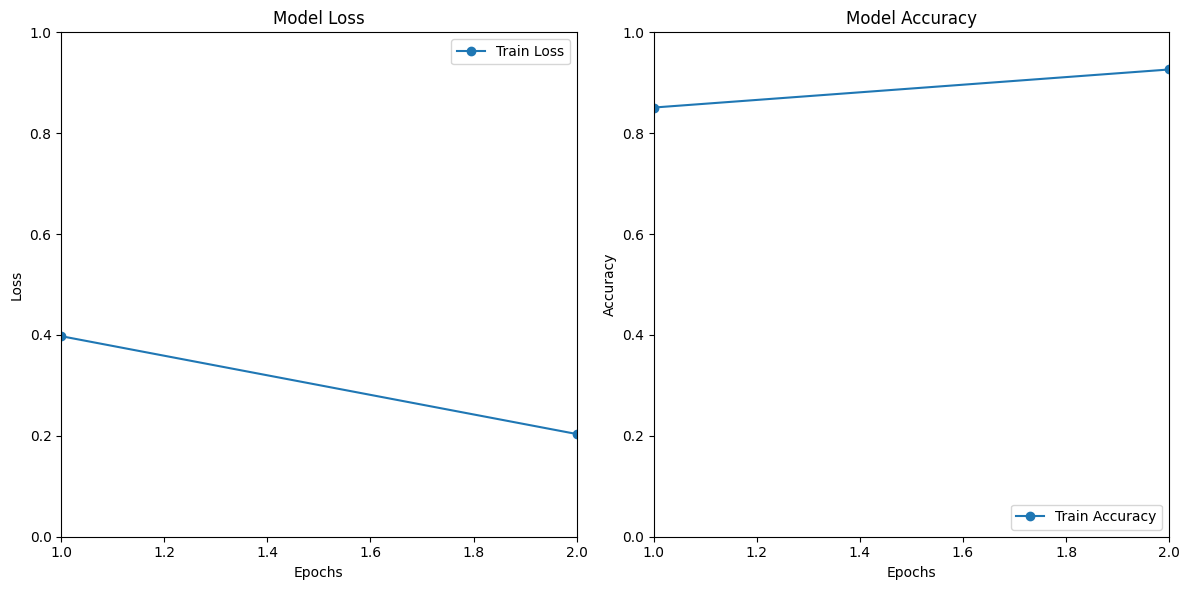

In [52]:
plot_loss_accuracy(hist_gru_tfidf)

## Word2Vector

In [53]:
# 8. GRU dengan Word2Vec
gru_w2v = Sequential([
    Reshape((1, X_train_w2v.shape[1]), input_shape=(X_train_w2v.shape[1],)),
    GRU(128, return_sequences=False),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
gru_w2v.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_gru_w2v = gru_w2v.fit(X_train_w2v, y_train, epochs=10, batch_size=32, callbacks=[callbacks])
evaluate_model(gru_w2v, X_test_w2v, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6429 - loss: 0.8173
Epoch 2/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6461 - loss: 0.8024
Epoch 3/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6437 - loss: 0.8039
Epoch 4/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6485 - loss: 0.7987
Epoch 5/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6428 - loss: 0.8025
Epoch 6/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6420 - loss: 0.7999
Epoch 7/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6467 - loss: 0.7969
Epoch 8/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6452 - loss: 0.8009
Epoch 9/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6390 - loss: 0.8046
Epoch 10/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6429 - loss: 0.7988
Test Accuracy: 0.6401
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   supp

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


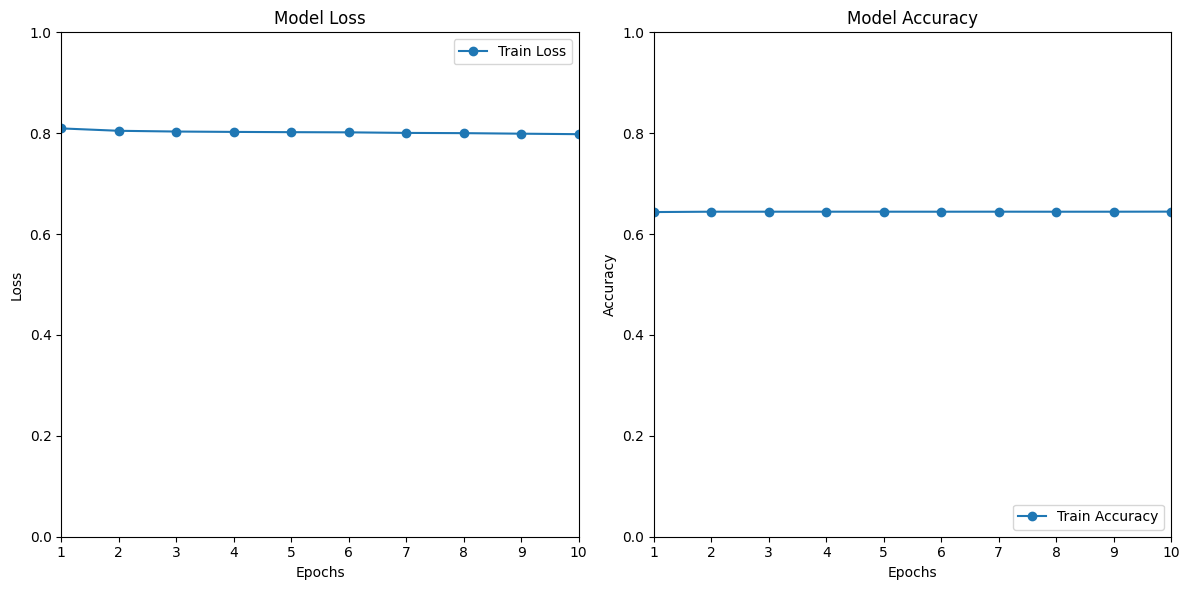

In [54]:
plot_loss_accuracy(hist_gru_w2v)

## FastText

In [55]:
# 9. GRU dengan FastText
gru_ft = Sequential([
    Reshape((1, X_train_ft.shape[1]), input_shape=(X_train_ft.shape[1],)),
    GRU(128, return_sequences=False),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
gru_ft.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_gru_ft = gru_ft.fit(X_train_ft, y_train, epochs=10, batch_size=32, callbacks=[callbacks])
evaluate_model(gru_ft, X_test_ft, y_test)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1378/1378 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6399 - loss: 0.8189
Epoch 2/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6451 - loss: 0.8029
Epoch 3/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6404 - loss: 0.8083
Epoch 4/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6470 - loss: 0.8009
Epoch 5/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6431 - loss: 0.8014
Epoch 6/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6429 - loss: 0.8071
Epoch 7/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6477 - loss: 0.7974
Epoch 8/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6423 - loss: 0.8023
Epoch 9/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6458 - loss: 0.7999
Epoch 10/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6466 - loss: 0.7993
Test Accuracy: 0.6401
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

        

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


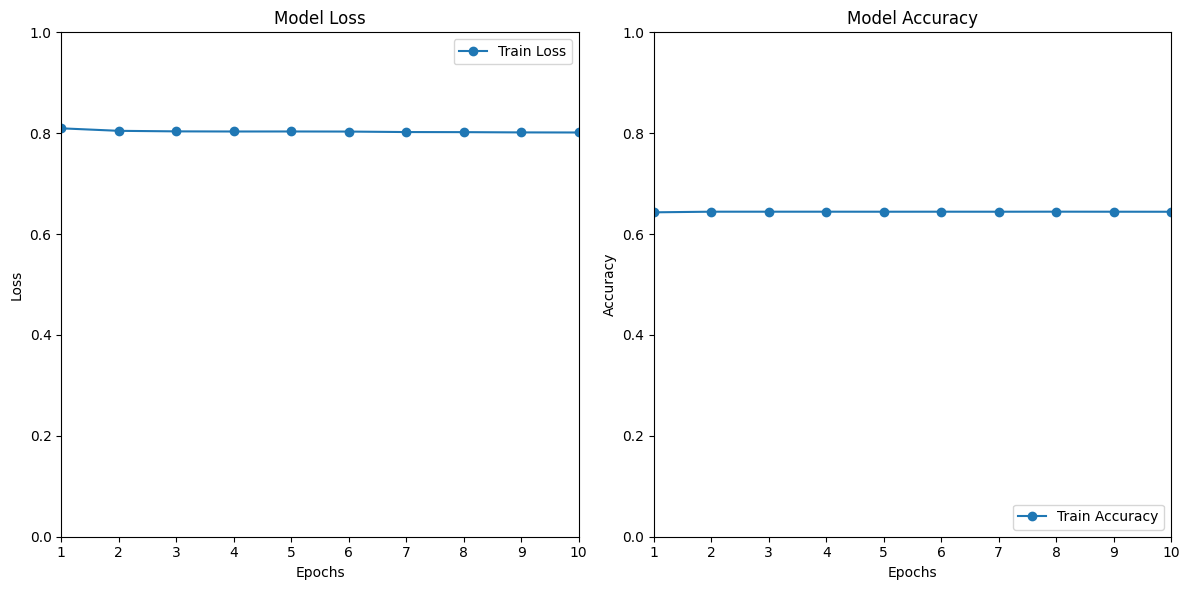

In [56]:
plot_loss_accuracy(hist_gru_ft)

# Model Evaluation

Bagian evaluasi ini mengumpulkan akurasi pelatihan dan pengujian dari semua model (Dense, LSTM, GRU) dengan berbagai feature extraction (TF-IDF, Word2Vec, FastText) ke dalam DataFrame untuk memudahkan perbandingan. Selanjutnya, DataFrame ini diurutkan berdasarkan akurasi pengujian, dan visualisasi bar plot dibuat untuk membandingkan performa antar model secara grafis. Terakhir, dilakukan analisis rata-rata akurasi pengujian yang dikelompokkan berdasarkan jenis feature extraction dan arsitektur model untuk mengidentifikasi tren performa berdasarkan kedua faktor tersebut.

=== Hasil Lengkap ===


,Model,Feature,Architecture,Train Accuracy,Test Accuracy
3,LSTM TF-IDF,TF-IDF,LSTM,0.9274,0.9241
0,Dense TF-IDF,TF-IDF,Dense,0.9228,0.9239
6,GRU TF-IDF,TF-IDF,GRU,0.9263,0.9210
2,Dense FastText,FastText,Dense,0.6444,0.6401
1,Dense Word2Vec,Word2Vec,Dense,0.6444,0.6401
8,GRU FastText,FastText,GRU,0.6443,0.6401
5,LSTM FastText,FastText,LSTM,0.6444,0.6401
7,GRU Word2Vec,Word2Vec,GRU,0.6445,0.6401
4,LSTM Word2Vec,Word2Vec,LSTM,0.6447,0.6399


<ipython-input-57-c3926ac45886>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_results, x='Test Accuracy', y='Model', palette='viridis')


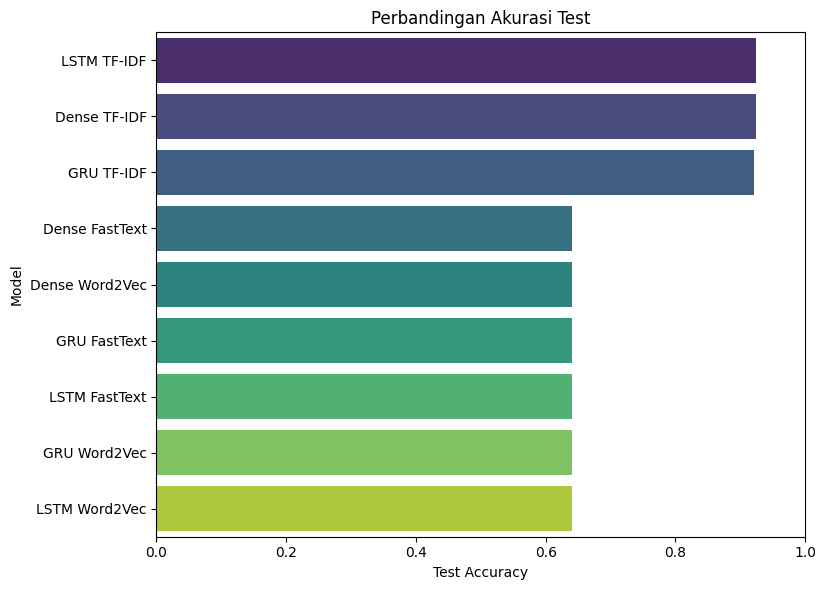


=== Rangkuman Performa ===

Berdasarkan Ekstraksi Fitur:


,Test Accuracy
Feature,
TF-IDF,0.9230
FastText,0.6401
Word2Vec,0.6400



Berdasarkan Arsitektur Model:


,Test Accuracy
Architecture,
Dense,0.7347
LSTM,0.7347
GRU,0.7337


In [57]:
# Membuat DataFrame hasil semua model
results = {
    'Model': [
        'Dense TF-IDF', 'Dense Word2Vec', 'Dense FastText',
        'LSTM TF-IDF', 'LSTM Word2Vec', 'LSTM FastText',
        'GRU TF-IDF', 'GRU Word2Vec', 'GRU FastText'
    ],
    'Train Accuracy': [
        hist_dense_tfidf.history['accuracy'][-1],
        hist_dense_w2v.history['accuracy'][-1],
        hist_dense_ft.history['accuracy'][-1],
        hist_lstm_tfidf.history['accuracy'][-1],
        hist_lstm_w2v.history['accuracy'][-1],
        hist_lstm_ft.history['accuracy'][-1],
        hist_gru_tfidf.history['accuracy'][-1],
        hist_gru_w2v.history['accuracy'][-1],
        hist_gru_ft.history['accuracy'][-1]
    ],
    'Test Accuracy': [
        dense_tfidf.evaluate(X_test_tfidf, y_test, verbose=0)[1],
        dense_w2v.evaluate(X_test_w2v, y_test, verbose=0)[1],
        dense_ft.evaluate(X_test_ft, y_test, verbose=0)[1],
        lstm_tfidf.evaluate(X_test_tfidf, y_test, verbose=0)[1],
        lstm_w2v.evaluate(X_test_w2v, y_test, verbose=0)[1],
        lstm_ft.evaluate(X_test_ft, y_test, verbose=0)[1],
        gru_tfidf.evaluate(X_test_tfidf, y_test, verbose=0)[1],
        gru_w2v.evaluate(X_test_w2v, y_test, verbose=0)[1],
        gru_ft.evaluate(X_test_ft, y_test, verbose=0)[1]
    ]
}

results_df = pd.DataFrame(results)

# Menambahkan kolom baru untuk ekstraksi fitur dan arsitektur
results_df['Feature'] = ['TF-IDF', 'Word2Vec', 'FastText'] * 3
results_df['Architecture'] = ['Dense']*3 + ['LSTM']*3 + ['GRU']*3

# Tampilkan hasil terurut berdasarkan Test Accuracy
pd.set_option('display.float_format', '{:.4f}'.format)
sorted_results = results_df.sort_values('Test Accuracy', ascending=False)

print("=== Hasil Lengkap ===")
display(sorted_results[['Model', 'Feature', 'Architecture', 'Train Accuracy', 'Test Accuracy']])

# Visualisasi Perbandingan
plt.figure(figsize=(15, 6))

# Plot Test Accuracy
plt.subplot(1, 2, 1)
sns.barplot(data=sorted_results, x='Test Accuracy', y='Model', palette='viridis')
plt.title('Perbandingan Akurasi Test')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

# Analisis Cross-Feature/Architecture
print("\n=== Rangkuman Performa ===")

# Group by Feature Extraction
feature_stats = results_df.groupby('Feature')[['Test Accuracy']].mean()
print("\nBerdasarkan Ekstraksi Fitur:")
display(feature_stats.sort_values('Test Accuracy', ascending=False))

# Group by Architecture
arch_stats = results_df.groupby('Architecture')[['Test Accuracy']].mean()
print("\nBerdasarkan Arsitektur Model:")
display(arch_stats.sort_values('Test Accuracy', ascending=False))

Dari grafik ini, dapat diamati bahwa:

Model-model yang menggunakan fitur TF-IDF secara konsisten menunjukkan akurasi pengujian tertinggi dibandingkan dengan model yang menggunakan fitur Word2Vec atau FastText. LSTM TF-IDF dan GRU TF-IDF tampak memiliki akurasi yang sangat tinggi dan serupa, diikuti oleh Dense TF-IDF.
Model-model yang menggunakan fitur Word2Vec dan FastText cenderung memiliki akurasi pengujian yang lebih rendah dan relatif mirip satu sama lain, terlepas dari arsitektur model yang digunakan.
Secara visual, tidak ada perbedaan yang signifikan dalam akurasi pengujian antara arsitektur model (Dense, LSTM, GRU) ketika menggunakan jenis feature extraction yang sama (terutama untuk Word2Vec dan FastText, di mana batang-batangnya terlihat memiliki akurasi yang serupa).

Performa model sangat dipengaruhi oleh jenis feature extraction yang digunakan. TF-IDF terbukti menjadi representasi fitur yang paling efektif untuk tugas analisis sentimen pada dataset ini, menghasilkan akurasi yang jauh lebih tinggi dibandingkan dengan Word2Vec dan FastText. Sementara itu, pilihan arsitektur model (Dense, LSTM, GRU) tampaknya memiliki dampak yang lebih kecil pada performa, meskipun LSTM dan GRU menunjukkan sedikit keunggulan rata-rata dibandingkan Dense. Kombinasi LSTM atau GRU dengan TF-IDF menghasilkan model dengan akurasi pengujian tertinggi. **Oleh karena itu, model yang paling optimal untuk dilakuakn inferensi adalah dengan menggunakan model LSTM dengan ekstraksi fitur TF-IDF.** Berikut adalah inferensinya

In [60]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = lstm_tfidf.predict(X_kalimat_baru)
prediksi_kelas = np.argmax(prediksi_sentimen, axis=1)[0]


# Menampilkan hasil prediksi
if prediksi_kelas == 0:
    print("Sentimen kalimat baru adalah POSITIF.")
elif prediksi_kelas == 1:
    print("Sentimen kalimat baru adalah NETRAL.")
elif prediksi_kelas == 2:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: aplikasi yang jelek, sangat berat, dan menyusahkan
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Sentimen kalimat baru adalah NEGATIF.


Kode ini akan melakukan prediksi sentimen yang tersirat pada kalimat yang dimasukkan melalui input keyboard. Kemudian kalimat baru yang dimasukkan ini dilakukan preprocessing, dilakukan feature extraction, dan dilakukan prediksi menggunakan model lstm_tfidf yang telah dilatih sebelumnya. Dihasilkan bahwa kalimat "aplikasi yang jelek, sangat berat, dan menyusahkan" akan diprediksi dan dihasilkan sentimen NEGATIF.

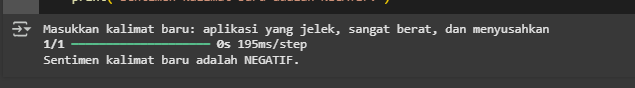

In [62]:
!pip freeze > requirements.txt